In [1]:
from IPython.display import display, Image
from pprint import pprint
from itertools import chain

from sympy import Function, Symbol, symbols, ratsimp
import pyx

from ginv import *
sympy.init_printing()

In [2]:
Monom.cmp = Monom.POTlex

In [3]:
h, tau, nu = sympy.symbols('h, tau, nu', real=True)

In [4]:
var = 'j, k'.split(', ')
fun = 'ux, uy, u'.split(', ')
Monom.init(var, fun)
T = PolySchem.T
var, fun = PolySchem.init()
j, k = var
ux, uy, u = fun

In [5]:
(T(u, j, 2, k) - T(ux, k, k, j, 2))/(2*h)

[[[0;2 2], -1/(2*h)], [[2;2 1], 1/(2*h)]]

Here's the translation into English:

Let us write the Laplace equation $ u_{xx} + u_{yy} = 0 $ in a divergence form, where  
\begin{eqnarray*}  
 \oint \limits_{\Gamma} \!- u_y \, dx + u_x \, dy = 0  
  \label{ch4.1:yyy1}  
\end{eqnarray*}  
holds for any closed contour $ \Gamma $.  

To transition to a discrete formulation, we associate $ u(x, y) = u(x_j, y_k) $ and choose as the basic volume the contour shown in the figure.  

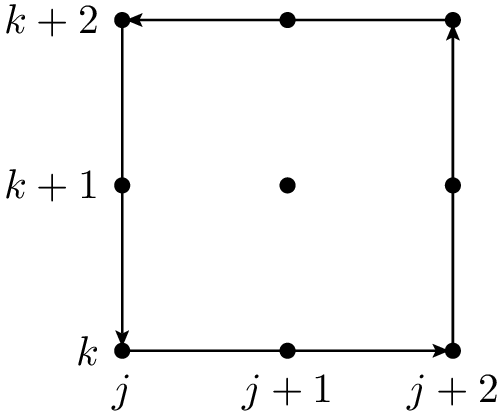

In [6]:
Image("./stencil2D3x3y.png", width=250)

In [7]:
laplace = Forest(Janet)
res = ginvMin((
T(ux, j)*2*h - (T(u, j, 2) - T(u)),\
T(uy, k)*2*h - (T(u, k, 2) - T(u)),\
-(T(uy, j) - T(uy, j, k, 2))*2*h +\
 (T(ux, j, 2, k) - T(ux, k))*2*h), \
laplace, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace.count()}")
print(f"reduction: {laplace.reduction()}")
print(f"       HP: {laplace.HP()}")

prolong uy*k
T(uy, k)
prolong ux*j
T(ux, j)
prolong ux*j**2*k
T(ux, k)
prolongAll
T(uy, j, 2)
prolongAll
T(uy, j, k)
prolongAll
T(u, j, 4, k, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.02 sec
    count: 6
reduction: 7
       HP: 6s - 6


In [8]:
for w in laplace.GB():
    print(w.poly)

T(ux, k)*(-2*h) + T(uy, j)*(-2*h) + T(u, j, 3, k) + T(u, j, k, 3) + T(u, j, k)*(-2)
T(ux, j)*2*h + T(u, j, 2)*(-1) + T(u)
T(uy, k)*2*h + T(u, k, 2)*(-1) + T(u)
T(uy, j, 2)*(-2*h) + T(u, j, 4, k) + T(u, j, 2, k, 3) + T(u, j, 2, k)*(-3) + T(u, k)
T(u, j, 4, k, 2)*(-1) + T(u, j, 2, k, 4)*(-1) + T(u, j, 2, k, 2)*4 + T(u, j, 2)*(-1) + T(u, k, 2)*(-1)


In [9]:
for w in laplace[-1].GB():
    print(w.poly)

T(u, j, 4, k, 2)*(-1) + T(u, j, 2, k, 4)*(-1) + T(u, j, 2, k, 2)*4 + T(u, j, 2)*(-1) + T(u, k, 2)*(-1)


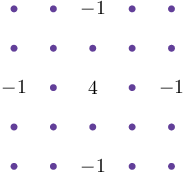

In [10]:
for w in laplace[-1].GB():
    display(sum(Symbol(m.T_latex())*c for m, c in w.poly))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), c) for m, c in w.poly)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\Large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)

In [11]:
laplace = Forest(Janet)
res = ginvMin((
(T(ux, j) + T(ux))/2*h - (T(u, j) - T(u)),\
(T(uy, k) + T(uy))/2*h - (T(u, k) - T(u)),\
-(T(uy, j) - T(uy, j, k, 2))*2*h +\
 (T(ux, j, 2, k) - T(ux, k))*2*h), \
laplace, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace.count()}")
print(f"reduction: {laplace.reduction()}")
print(f"       HP: {laplace.HP()}")

prolong uy*k
T(uy, k)
prolong ux*j
T(ux, j)
prolong ux*j**2*k
T(u, j, 2, k)
prolongAll
crit1: 0
crit2: 0
 time: 0.01 sec
    count: 3
reduction: 5
       HP: 5s + 2


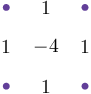

In [12]:
for w in laplace[-1].GB():
    display(sum(Symbol(m.T_latex())*c for m, c in w.poly))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), c) for m, c in w.poly)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\Large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)

As a result, the last equation is the desired **finite-difference scheme** written at **single nodes**:  

\begin{eqnarray*}  
 \frac{u_{j+1 \, k} - 2 u_{j \, k} + u_{j - 1 \, k}}{4 h^2}  
 + \frac{u_{j \, k+1} - 2 u_{j \, k} + u_{j \, k-1}}{4 h^2} = 0.  
 \end{eqnarray*}  


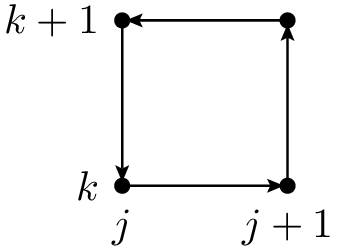

In [13]:
Image("./stencil2D2x2y.png", width=200)

In [14]:
laplace = Forest(Janet)
res = ginvMin((
T(ux, j)*2*h - (T(u, j, 2) - T(u)),\
T(uy, k)*2*h - (T(u, k, 2) - T(u)),\
-((T(uy) + T(uy, j))/2 - (T(uy, j, k) + T(uy, k))/2)*h +\
 ((T(ux, j) + T(ux, j, k))/2 - (T(ux, k) + T(ux))/2)*h), \
laplace, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace.count()}")
print(f"reduction: {laplace.reduction()}")
print(f"       HP: {laplace.HP()}")

prolong uy*k
T(uy, k)
prolong ux*j
T(ux, j)
prolong ux*j*k
T(ux, k)
prolongAll
T(uy, j, 2)
prolongAll
T(uy, j, k)
prolongAll
T(u, j, 3, k, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.03 sec
    count: 6
reduction: 11
       HP: 5s - 2


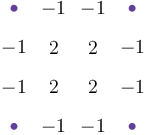

In [15]:
for w in laplace[-1].GB():
    display(sum(Symbol(m.T_latex())*c for m, c in w.poly))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), c) for m, c in w.poly)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\Large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)

In [16]:
laplace = Forest(Janet)
res = ginvMin((
(T(ux, j) + T(ux))/2*h - (T(u, j) - T(u)),\
(T(uy, k) + T(uy))/2*h - (T(u, k) - T(u)),\
-((T(uy) + T(uy, j))/2 - (T(uy, j, k) + T(uy, k))/2)*h +\
 ((T(ux, j) + T(ux, j, k))/2 - (T(ux, k) + T(ux))/2)*h), \
laplace, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace.count()}")
print(f"reduction: {laplace.reduction()}")
print(f"       HP: {laplace.HP()}")

prolong uy*k
T(uy, k)
prolong ux*j
T(ux, j)
prolong ux*j*k
T(ux, k)
prolongAll
T(uy, j, 2)
prolongAll
T(uy, j, k)
prolongAll
T(u, j, 2, k, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.03 sec
    count: 6
reduction: 14
       HP: 4s + 1


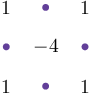

In [17]:
for w in laplace[-1].GB():
    display(sum(Symbol(m.T_latex())*c for m, c in w.poly))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), c) for m, c in w.poly)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\Large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)

<https://en.wikipedia.org/wiki/Compact_finite_difference>

### Fourth-order central scheme:
$$\frac{1}{12}f''_{i-1} + \frac{5}{6}f''_{i} + \frac{1}{12}f''_{i+1} = \frac{f_{i+1} - 2f_{i} + f_{i-1}}{h^2}.$$

### Integral form:
$$- \int\limits_{0}^{1}\int f{\left(x \right)}\, dx\, dx + \int\limits_{1}^{2}\int f{\left(x \right)}\, dx\, dx = - \frac{f^{(4)} h^{6}}{240} + h^{2} \left(\frac{f{\left(x_{i} \right)}}{12} + \frac{5 f{\left(x_{i+1} \right)}}{6} + \frac{f{\left(x_{i+2} \right)}}{12}\right).$$


In [18]:
var = 'j, k'.split(', ')
fun = 'uxx, uyy, u'.split(', ')
Monom.init(var, fun)
T = PolySchem.T
var, fun = PolySchem.init()
j, k = var
uxx, uyy, u = fun

In [19]:
laplace = Forest(Janet)
res = ginvMin((
(T(uxx, j, 2)/12 + 5*T(uxx, j)/6  + T(uxx)/12)*h**2\
    - (T(u, j, 2) - 2* T(u, j) + T(u)),\
(T(uyy, k, 2)/12 + 5*T(uyy, k)/6  + T(uyy)/12)*h**2\
    - (T(u, k, 2) - 2* T(u, k) + T(u)),\
T(uxx) + T(uyy)), \
laplace, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace.count()}")
print(f"reduction: {laplace.reduction()}")
print(f"       HP: {laplace.HP()}")

prolong uyy*k**2
T(uyy, k, 2)
prolong uxx
T(uxx)
prolong uxx*j**2
T(uyy, j, 2)
prolongAll
T(uyy, j, k, 2)
prolongAll
T(u, j, 2, k, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.03 sec
    count: 5
reduction: 10
       HP: 4s + 2


In [20]:
for w in laplace.GB():
    print(w.poly)

T(uxx) + T(uyy)
T(uyy, k, 2)*h**2 + T(uyy, k)*10*h**2 + T(uyy)*h**2 + T(u, k, 2)*(-12) + T(u, k)*24 + T(u)*(-12)
T(uyy, j, 2)*(-h**2) + T(uyy, j)*(-10*h**2) + T(uyy)*(-h**2) + T(u, j, 2)*(-12) + T(u, j)*24 + T(u)*(-12)
T(u, j, 2, k, 2) + T(u, j, 2, k)*4 + T(u, j, 2) + T(u, j, k, 2)*4 + T(u, j, k)*(-20) + T(u, j)*4 + T(u, k, 2) + T(u, k)*4 + T(u)


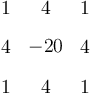

In [21]:
for w in laplace[-1].GB():
    p = sum(Symbol(m.T_latex())*c for m, c in w.poly).expand()
    display(ratsimp(p.coeff(h, 0)))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), c) for m, c in w.poly)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\Large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)

In [22]:
var = 'j, k'.split(', ')
fun = 'uxx, uyy, u, f'.split(', ')
Monom.init(var, fun)
T = PolySchem.T
var, fun = PolySchem.init()
j, k = var
uxx, uyy, u, f = fun

In [23]:
laplace = Forest(Janet)
res = ginvMin((
(T(uxx, j, 2)/12 + 5*T(uxx, j)/6  + T(uxx)/12)*h**2\
    - (T(u, j, 2) - 2* T(u, j) + T(u)),\
(T(uyy, k, 2)/12 + 5*T(uyy, k)/6  + T(uyy)/12)*h**2\
    - (T(u, k, 2) - 2* T(u, k) + T(u)),\
T(uxx) + T(uyy) - T(f)), \
laplace, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace.count()}")
print(f"reduction: {laplace.reduction()}")
print(f"       HP: {laplace.HP()}")

prolong uyy*k**2
T(uyy, k, 2)
prolong uxx
T(uxx)
prolong uxx*j**2
T(uyy, j, 2)
prolongAll
T(uyy, j, k, 2)
prolongAll
T(u, j, 2, k, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.02 sec
    count: 5
reduction: 10
       HP: s^2/2 + 11s/2 + 3


In [24]:
for w in laplace.GB():
    print(w.poly)

T(uxx) + T(uyy) + T(f)*(-1)
T(uyy, k, 2)*h**2 + T(uyy, k)*10*h**2 + T(uyy)*h**2 + T(u, k, 2)*(-12) + T(u, k)*24 + T(u)*(-12)
T(uyy, j, 2)*(-h**2) + T(uyy, j)*(-10*h**2) + T(uyy)*(-h**2) + T(u, j, 2)*(-12) + T(u, j)*24 + T(u)*(-12) + T(f, j, 2)*h**2 + T(f, j)*10*h**2 + T(f)*h**2
T(u, j, 2, k, 2)*24 + T(u, j, 2, k)*96 + T(u, j, 2)*24 + T(u, j, k, 2)*96 + T(u, j, k)*(-480) + T(u, j)*96 + T(u, k, 2)*24 + T(u, k)*96 + T(u)*24 + T(f, j, 2, k, 2)*(-h**2) + T(f, j, 2, k)*(-10*h**2) + T(f, j, 2)*(-h**2) + T(f, j, k, 2)*(-10*h**2) + T(f, j, k)*(-100*h**2) + T(f, j)*(-10*h**2) + T(f, k, 2)*(-h**2) + T(f, k)*(-10*h**2) + T(f)*(-h**2)


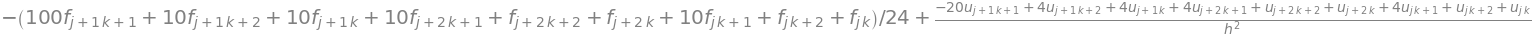

In [25]:
for w in laplace[-2].GB():
    p = sum(Symbol(m.T_latex())*c for m, c in w.poly).expand()/24
    display(ratsimp(p.coeff(h, 2)).factor() +
            ratsimp(p.coeff(h, 0)/h**2))

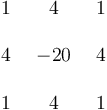

In [26]:
for w in laplace[-2].GB():
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.2
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), c/24) for m, c in w.poly if m.position() == 2)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\Large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)

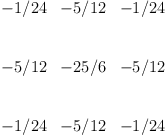

In [27]:
for w in laplace[-2].GB():
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.5
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), ratsimp(c.coeff(h, 2)/24)) for m, c in w.poly if m.position() == 3)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)

In [28]:
var = 'n, j'.split(', ')
fun = 'uxx, ux, ut, u, P'.split(', ')
Monom.init(var, fun)
T = PolySchem.T
var, fun = PolySchem.init()
n, j = var
uxx, ux, ut, u, P = fun

$$
\oint _{\Gamma} (P + u_{xx})\, dt + u \, dx=0\,
$$
\begin{equation}\label{discrete}
\begin{gathered}
((P^n_{j+2}+P^{n+1}_{j+2})/2 - (P^n_j+P^{n+1}_j)/2)\,\tau + {}\\
(({u_{xx}}^n_{j+2}+{u_{xx}}^{n+1}_{j+2})/2 - ({u_{xx}}^n_j+{u_{xx}}^{n+1}_j)/2)\,\tau + {}\\
(2u^n_{j+1} - 2u^{n+1}_{j+1})\,h=0.
\end{gathered}
\end{equation}
<img src="./stencil2D3t2x.png" width="250">

In [29]:
KDV = Forest(Janet)
res = ginvMin((\
((T(P, j, 2) + T(P, n, j, 2))/2 - (T(P) + T(P, n))/2)*tau +\
((T(uxx, j, 2) + T(uxx, n, j, 2))/2 - (T(uxx) + T(uxx, n))/2)*tau +\
(2*T(u, j) - 2*T(u, n, j))*h,\
(T(ux, j) + T(ux))/2*h - (T(u, j) - T(u)),\
T(uxx, j)*2*h - (T(ux, j, 2) - T(ux)),\
), KDV, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {KDV.count()}")
print(f"reduction: {KDV.reduction()}")
print(f"       HP: {KDV.HP()}")

prolong ux*j
T(ux, j)
prolong uxx*j
T(uxx, j)
prolong uxx*n*j**2
T(uxx, n)
prolongAll
T(u, n, j, 4)
prolongAll
crit1: 0
crit2: 0
 time: 0.04 sec
    count: 4
reduction: 8
       HP: s^2 + 9s - 1


In [30]:
for w in KDV[-2].GB():
    print(w.poly)

T(u, n, j, 4)*(-tau) + T(u, n, j, 3)*2*tau + T(u, n, j, 2)*4*h**3 + T(u, n, j)*(-2*tau) + T(u, n)*tau + T(u, j, 4)*(-tau) + T(u, j, 3)*2*tau + T(u, j, 2)*(-4*h**3) + T(u, j)*(-2*tau) + T(u)*tau + T(P, n, j, 3)*(-h**2*tau) + T(P, n, j)*h**2*tau + T(P, j, 3)*(-h**2*tau) + T(P, j)*h**2*tau


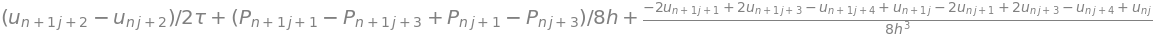

In [31]:
for w in KDV[-2].GB():
    p = sum(Symbol(m.T_latex())*c for m, c in w.poly).expand()
    display(ratsimp(p.coeff(tau, 0).coeff(h, 3)/(8*tau)) +
            ratsimp(p.coeff(tau, 1).coeff(h, 2)/(8*h)) +
            ratsimp(p.coeff(tau, 1).coeff(h, 0)/(8*h**3)))

**First-derivative approximation (4th-order compact scheme):**  
$$
\frac{1}{6}f'_{i+1} + \frac{2}{3}f'_{i} + \frac{1}{6}f'_{i-1} = \frac{f_{i+1} - f_{i-1}}{2h}  
$$  

**Second-derivative approximation (4th-order compact scheme):**  
$$
\frac{1}{12}f''_{i+1} + \frac{5}{6}f''_{i} + \frac{1}{12}f''_{i-1} = \frac{f_{i+1} - 2f_{i} + f_{i-1}}{h^2}  
$$  

Nayfeh A. H. Introduction to Perturbation Techniques, Wiley-VCH, 1st edition, 1993. 536 p.

**Given the governing equation:**  
$$
\varepsilon f''_{i} + \left(1 + \varepsilon^{2}\right)f'_{i} + \left(1 - \varepsilon^{2}\right)f_{i} = 0  
$$  


In [32]:
eps, h = symbols(r'\varepsilon,  h', real=True)
eps0 = sympy.Symbol(r'(1 + {\varepsilon^2})', real=True)
eps1 = sympy.Symbol(r'(1 - {\varepsilon^2})', real=True)
# eps0, eps1 = 1 + eps**2, 1 - eps**2 
eps, eps0, eps1, h

In [33]:
var = 'j'.split(', ')
fun = 'uxx, ux, u'.split(', ')
Monom.init(var, fun)
T = PolySchem.T
var, fun = PolySchem.init()
j = var[0]
uxx, ux, u = fun

In [34]:
# Monom.cmp = Monom.TOPdeglex
Monom.cmp = Monom.POTdeglex
BL = Forest(Janet)
# res = ginvBlockLow((\
res = ginvMin((\
(T(ux, j, 2)/6 + 2*T(ux, j)/3 + T(ux)/6) - (T(u, j, 2) - T(u))/(2*h),\
(T(uxx, j, 2)/12 + 5*T(uxx, j)/6 + T(uxx)/12) - (T(u, j, 2) - 2*T(u, j) + T(u))/h**2,\
eps*T(uxx) + eps0*T(ux) + eps1*T(u),\
), BL, level=2)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {BL.count()}")
print(f"reduction: {BL.reduction()}")
print(f"       HP: {BL.HP()}")

prolong ux*j**2
T(ux, j, 2)
prolong uxx
T(uxx)
prolong uxx*j**2
T(ux, j)
prolong ux*j**2
T(ux)
prolong ux*j
T(u, j, 4)
prolongAll
crit1: 0
crit2: 0
 time: 0.08 sec
    count: 3
reduction: 11
       HP: 4


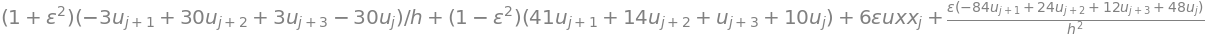

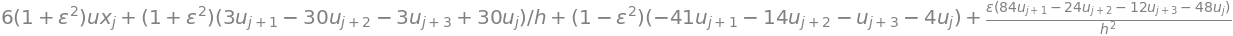

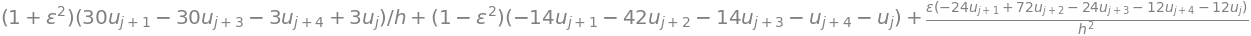

In [35]:
for w in BL.GB():
    p = sum(Symbol(m.T_latex())*c for m, c in w.poly).expand()
#     print(sympy.latex(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3))))
    display(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3)))

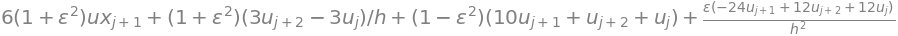

In [38]:
for w in BL[1].GB():
    p = -w.poly.prolong(0)
    p.NFtail(BL)
    p.pp()
    p = sum(Symbol(m.T_latex())*c for m, c in p).expand()
    display(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3)))

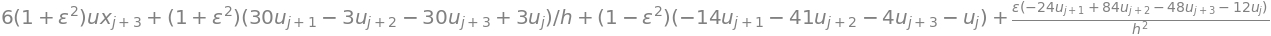

In [39]:
for w in BL[1].GB():
    p = w.poly.prolong(0).prolong(0).prolong(0)
    p.NFtail(BL)
    p.pp()
    p = sum(Symbol(m.T_latex())*c for m, c in p).expand()
    display(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3)))